In [1]:
#Packages installieren und importieren
import pandas as pd


# Datenset einlesen und anschauen
film = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Dialogue.csv", encoding ="iso-8859-1")
film
film.info()
film.head(2)

# Film 1 separieren
film1= film[film["Chapter ID"] <=34]
film1.head(5)
film1.shape
film1.info()
film1.describe()
film1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   7444 non-null   int64 
 1   Chapter ID    7444 non-null   int64 
 2   Place ID      7444 non-null   int64 
 3   Character ID  7444 non-null   int64 
 4   Dialogue      7444 non-null   object
dtypes: int64(4), object(1)
memory usage: 290.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 884
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   885 non-null    int64 
 1   Chapter ID    885 non-null    int64 
 2   Place ID      885 non-null    int64 
 3   Character ID  885 non-null    int64 
 4   Dialogue      885 non-null    object
dtypes: int64(4), object(1)
memory usage: 41.5+ KB


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away..."
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y..."
883,884,34,36,3,"Feels strange to be going home, doesn't it?"


In [2]:
#tokenziation & stopwords
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords

import string
#print(stopwords.words('english'))
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

film1["3WordCountText"] = film1["Dialogue"].str.lower().apply(remove_punctuations).apply(word_tokenize)
film1["3WordCountText"]
film1

dialoge = film1["3WordCountText"].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

film1["3withoutstopwords"] = filtered_tokens
film1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\3022726422.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["3WordCountText"] = film1["Dialogue"].str.lower().apply(remove_punctuations).apply(word_tokenize)
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\3022726422.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["3withoutstopwords"] =

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,3WordCountText,3withoutstopwords
0,1,1,8,4,I should have known that you would be here...P...,"[i, should, have, known, that, you, would, be,...","[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[i, m, afraid, so, professor, the, good, and, ...","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]"
...,...,...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...","[oh, go, on, on, with, you, oh, listen, harry,...","[oh, go, oh, listen, harry, dolt, cousin, dudl..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away...","[but, hagrid, we, re, not, allowed, to, do, ma...","[hagrid, allowed, magic, away, hogwarts, know]"
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...","[i, do, but, your, cousin, don, t, do, he, eh,...","[cousin, eh, go]"
883,884,34,36,3,"Feels strange to be going home, doesn't it?","[feels, strange, to, be, going, home, doesn, t...","[feels, strange, going, home]"


In [3]:
#stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language="english")

dialoge = film1["3withoutstopwords"] 
dialoge

PorterStem = []
for line in dialoge:
    for word in line:
        PorterStem.append(porter.stem(word))
PorterStem

LancasterStem = []
for line in dialoge:
    for word in line:
        LancasterStem.append(lancaster.stem(word))
LancasterStem

SnowballStem = []
for line in dialoge:
    for word in line:
        SnowballStem.append(snowball.stem(word))
SnowballStem


['known',
 'would',
 'professor',
 'mcgonagal',
 'good',
 'even',
 'professor',
 'dumbledor',
 'rumour',
 'true',
 'albus',
 'afraid',
 'professor',
 'good',
 'bad',
 'boy',
 'hagrid',
 'bring',
 'think',
 'wise',
 'trust',
 'hagrid',
 'someth',
 'import',
 'ah',
 'professor',
 'would',
 'trust',
 'hagrid',
 'life',
 'professor',
 'dumbledor',
 'sir',
 'professor',
 'mcgonagal',
 'problem',
 'trust',
 'hagrid',
 'sir',
 'littl',
 'tyke',
 'fell',
 'asleep',
 'fli',
 'bristol',
 'heh',
 'tri',
 'wake',
 'go',
 'albus',
 'realli',
 'think',
 'safe',
 'leav',
 'peopl',
 'watch',
 'day',
 'worst',
 'sort',
 'muggl',
 'imagin',
 'realli',
 'famili',
 'boy',
 'famous',
 'child',
 'world',
 'know',
 'name',
 'exact',
 'better',
 'grow',
 'away',
 'readi',
 'hagrid',
 'realli',
 'goodby',
 'good',
 'luck',
 'harri',
 'potter',
 'get',
 'wake',
 'cousin',
 'go',
 'zoo',
 'oh',
 'come',
 'birthday',
 'boy',
 'happi',
 'birthday',
 'son',
 'cook',
 'breakfast',
 'tri',
 'burn',
 'anyth',
 'yes',


PorterStemmer von M.F.Porter 1980 --> nur Englisch
SnowballStemmer von M.F.Porter als Verbesserung --> mehrere Sprachen
LancasterStemmer von C.D.Paice an der Lancaster Universität --> aggressivste Algorithmus, da iterativer Ansatz _> nicht so effizient wie Porter oder Snowball

Lemmatisierung Weiterentwicklung des Stemmings

In [4]:
#nur Stemmingmethoden gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word,porter.stem(word), lancaster.stem(word),snowball.stem(word) ])

['known', 'known', 'known', 'known']
['would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal']
['good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even']
['professor', 'professor', 'profess', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor']
['rumours', 'rumour', 'rumo', 'rumour']
['true', 'true', 'tru', 'true']
['albus', 'albu', 'alb', 'albus']
['afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor']
['good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring']
['think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise']
['trust', 'trust', 'trust', 'trust']
['hagrid', 'hagrid', 'hagrid', 'hagrid']
['something', 'someth', 'someth', 'someth']
['important', 'import', 'import', 'import']
['ah', 'ah', 'ah', 'ah']
['professor', 'profess

In [5]:
#Lemmitization
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
wnl = WordNetLemmatizer() 

Lemi_Stem = []
for line in dialoge:
    Lemi_Line =[]
    for word in line: 
            Lemi_Line.append(wnl.lemmatize(word))  
    Lemi_Stem.append(Lemi_Line)
Lemi_Stem 


#Stemming und lemmitization gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word , porter.stem(word), lancaster.stem(word),snowball.stem(word), wnl.lemmatize(word)])

film1["Lemmitization"] = Lemi_Stem
film1

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['known', 'known', 'known', 'known', 'known']
['would', 'would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal', 'mcgonagall']
['good', 'good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even', 'evening']
['professor', 'professor', 'profess', 'professor', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor', 'dumbledore']
['rumours', 'rumour', 'rumo', 'rumour', 'rumour']
['true', 'true', 'tru', 'true', 'true']
['albus', 'albu', 'alb', 'albus', 'albus']
['afraid', 'afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor', 'professor']
['good', 'good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring', 'bringing']
['think', 'think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise', 'wise']
['trust', '

C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\4237545528.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["Lemmitization"] = Lemi_Stem


,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,3WordCountText,3withoutstopwords,Lemmitization
0,1,1,8,4,I should have known that you would be here...P...,"[i, should, have, known, that, you, would, be,...","[known, would, professor, mcgonagall]","[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, are, th...","[good, evening, professor, dumbledore, rumours...","[good, evening, professor, dumbledore, rumour,..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[i, m, afraid, so, professor, the, good, and, ...","[afraid, professor, good, bad]","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,"[and, the, boy]",[boy],[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[hagrid, bringing]"
...,...,...,...,...,...,...,...,...
880,881,34,36,5,"Oh. Go on...on with you. Oh, listen, Harry, i...","[oh, go, on, on, with, you, oh, listen, harry,...","[oh, go, oh, listen, harry, dolt, cousin, dudl...","[oh, go, oh, listen, harry, dolt, cousin, dudl..."
881,882,34,36,1,"But Hagrid, we're not allowed to do magic away...","[but, hagrid, we, re, not, allowed, to, do, ma...","[hagrid, allowed, magic, away, hogwarts, know]","[hagrid, allowed, magic, away, hogwarts, know]"
882,883,34,36,5,"I do. But your cousin don't, do he? Eh? Off y...","[i, do, but, your, cousin, don, t, do, he, eh,...","[cousin, eh, go]","[cousin, eh, go]"
883,884,34,36,3,"Feels strange to be going home, doesn't it?","[feels, strange, to, be, going, home, doesn, t...","[feels, strange, going, home]","[feel, strange, going, home]"


In [6]:
#part of speech tagging (POS)
nltk.download('averaged_perceptron_tagger')
nltk.download("maxent_ne_chunker")

dialoge = film1["3withoutstopwords"]
dialoge

pos_tag = []
for line in dialoge:
    for word in line:
        pos_tag.append(nltk.pos_tag([word]))
pos_tag


# from nltk import ne_chunk

# ne = []
# for line in pos_tag:
#     for word in pos_tag:
#         ne.append(nltk.ne_chunk(pos_tag))
# print(ne)

# chunk = ne_chunk(pos_tag)
# chunk 
 
#chunking


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


[[('known', 'VBN')],
 [('would', 'MD')],
 [('professor', 'NN')],
 [('mcgonagall', 'NN')],
 [('good', 'JJ')],
 [('evening', 'VBG')],
 [('professor', 'NN')],
 [('dumbledore', 'NN')],
 [('rumours', 'NNS')],
 [('true', 'JJ')],
 [('albus', 'NN')],
 [('afraid', 'NN')],
 [('professor', 'NN')],
 [('good', 'JJ')],
 [('bad', 'JJ')],
 [('boy', 'NN')],
 [('hagrid', 'NN')],
 [('bringing', 'VBG')],
 [('think', 'NN')],
 [('wise', 'NN')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('something', 'NN')],
 [('important', 'JJ')],
 [('ah', 'NN')],
 [('professor', 'NN')],
 [('would', 'MD')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('life', 'NN')],
 [('professor', 'NN')],
 [('dumbledore', 'NN')],
 [('sir', 'NN')],
 [('professor', 'NN')],
 [('mcgonagall', 'NN')],
 [('problems', 'NNS')],
 [('trust', 'NN')],
 [('hagrid', 'NN')],
 [('sir', 'NN')],
 [('little', 'JJ')],
 [('tyke', 'NN')],
 [('fell', 'VBD')],
 [('asleep', 'NN')],
 [('flying', 'VBG')],
 [('bristol', 'NN')],
 [('heh', 'NN')],
 [('try', 'NN')],
 [(

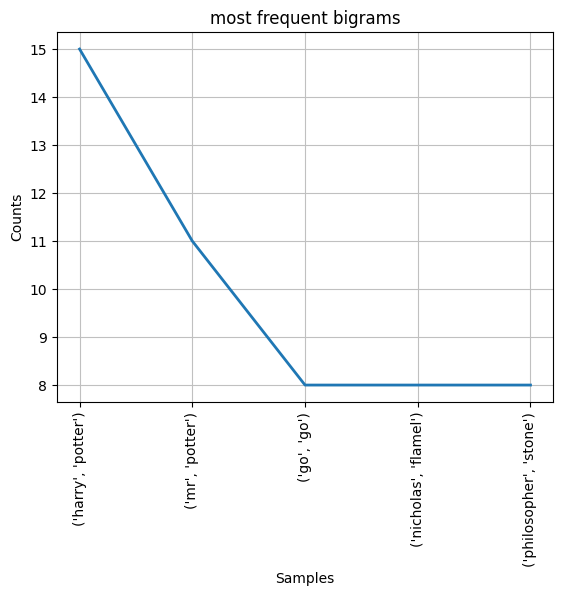

<AxesSubplot: title={'center': 'most frequent bigrams'}, xlabel='Samples', ylabel='Counts'>

In [7]:
#ngrams
from nltk.util import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt


dialoge = film1["3withoutstopwords"]
dialoge.tolist()
biGram = []
for line in dialoge:
    biGram.append(list(ngrams(line, 2)))
biGram


fdist = FreqDist()
for line in biGram:
    for word in line:
        fdist[word] +=1 
nGram_freq = fdist
nGram_freq

nGram_freq.plot(5,title="most frequent bigrams")
#Barplot?


#len(biGram)


In [8]:
#wie oft kommt ein Wort vor
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#mit allen Wörtern
dialoge = film1["3WordCountText"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
Token_freq = fdist
Token_freq.most_common(5)

#ohne Stopwords
dialoge = film1["3withoutstopwords"]
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
ohnestopwords_freq = fdist
freq = ohnestopwords_freq.most_common(5)


#fdist.plot(5, title = "most frequent top 5 Words")

print([Token_freq.most_common(5), ohnestopwords_freq.most_common(5)])

#für Harry
Charakter = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Characters.csv", encoding ="iso-8859-1")
Charakter

df = pd.merge(film1, Charakter, on = "Character ID")
df

harry = df[df["Character Name"] == "Harry Potter"]
harry
fdist = FreqDist()
for line in harry["3withoutstopwords"]:
    for word in line:
         fdist[word] +=1        
commonwords_freq = fdist
freq = commonwords_freq.most_common(5)
freq

[[('you', 392), ('i', 297), ('the', 288), ('s', 260), ('to', 241)], [('harry', 95), ('go', 58), ('oh', 54), ('know', 51), ('one', 49)]]


[('hagrid', 21), ('know', 16), ('one', 13), ('ron', 13), ('go', 11)]

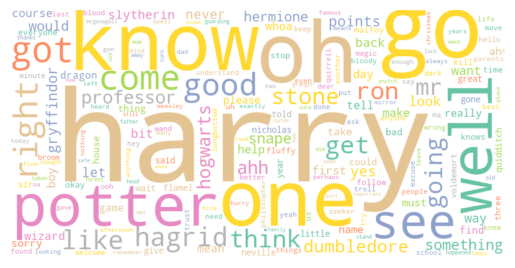

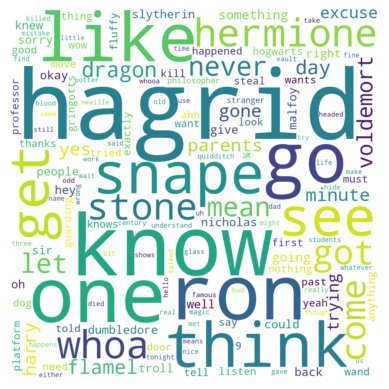

In [9]:
#Wordcloud für alle
import numpy as np
from wordcloud import WordCloud
word_cloud = WordCloud(background_color= "white", colormap = "Set2", width = 800, height = 400).generate_from_frequencies(ohnestopwords_freq)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#wordclound für Harry
word_cloud = WordCloud(background_color="white", width = 1000, height = 1000, min_font_size = 15).generate_from_frequencies(commonwords_freq)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

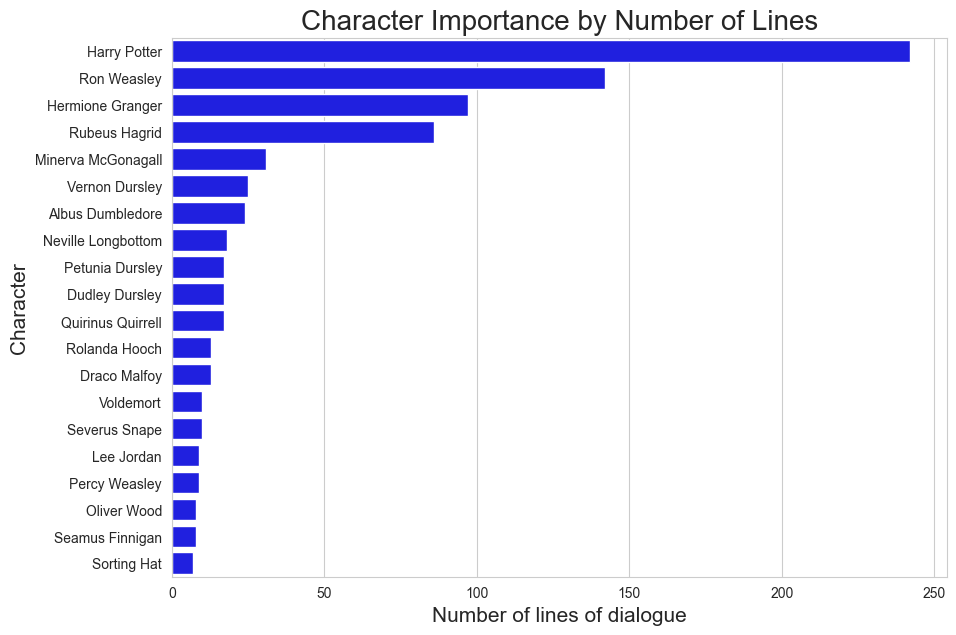

C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\1570430128.py:35: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x = "wordcount", y ="CharacterName", data = totalword, order = totalword.sort_values("wordcount",ascending = False).CharacterName[0:20], orient = "h", color = "Blue")


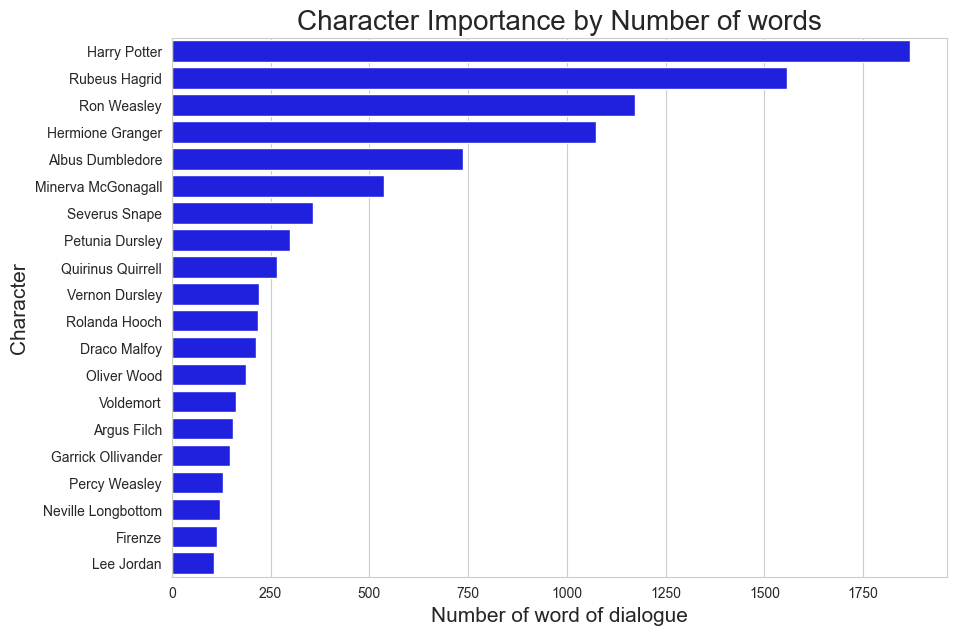

In [10]:
#Redeanteile der Charaktere pro Satz
import numpy 
import seaborn as sns
from collections import Counter
import re

charaktere = df["Character Name"].value_counts()
charaktere

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.countplot(y ="Character Name", data = df, order = df["Character Name"].value_counts().iloc[:20].index, color="blue")
plt.xlabel("Number of lines of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of Lines", fontsize = 20)
plt.show()

#Redeanteil der Charaktere pro Wort
dialoge = df["3WordCountText"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df["wordcount"] = wordcount
df

totalword = df.groupby("Character Name", as_index= False).wordcount.sum()
totalword = totalword.rename(columns ={ totalword.columns[0]: "CharacterName"})
totalword

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x = "wordcount", y ="CharacterName", data = totalword, order = totalword.sort_values("wordcount",ascending = False).CharacterName[0:20], orient = "h", color = "Blue")
plt.xlabel("Number of word of dialogue", fontsize = 15)
plt.ylabel("Character", fontsize = 15)
plt.title("Character Importance by Number of words", fontsize = 20)
plt.show()

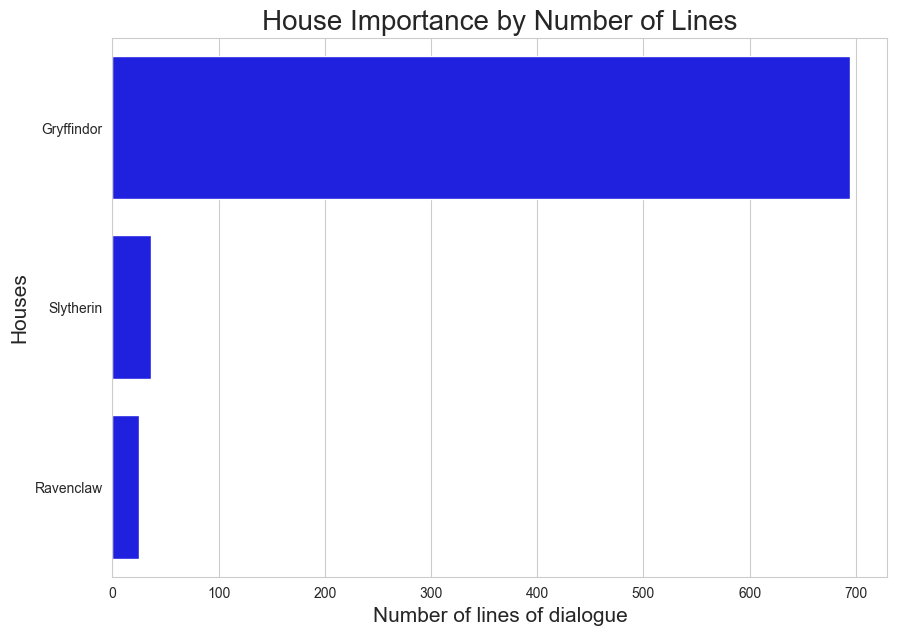

In [11]:
#Redeanteile der Häuser
import matplotlib.pyplot as plt
import numpy as np
house_Redeanteil = df["House"].value_counts()
house_Redeanteil
#ginge auch aber anderes schöner:
# plt.bar(x=["Gryffindor", "Slytherin","Ravenclaw"] , height= house_Redeanteil)
# plt.show()

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.countplot(y ="House", data = df, order = df["House"].value_counts().iloc[:20].index, color="blue")
plt.xlabel("Number of lines of dialogue", fontsize = 15)
plt.ylabel("Houses", fontsize = 15)
plt.title("House Importance by Number of Lines", fontsize = 20)
plt.show()

In [12]:
#häufigste Zaubersprüche
import collections
Zaubersprüche = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Spells.csv", encoding ="iso-8859-1")
Zaubersprüche =Zaubersprüche.rename(columns ={ Zaubersprüche.columns[0]: "Spell ID"})
Zaubersprüche

def extract_spells(row):
    words = row["3withoutstopwords"]
    
    spells=[]

    for i in range(len(words)-1):
        spell = words[i]+ " " + words[i+1]

        if spell in Zaubersprüche["Incantation"].values:
            spells.append(spell)
    return spells


df["spells"] = df.apply(extract_spells,axis =1)

spell_counts = df["spells"].value_counts()

print(spell_counts.head())

df.to_csv("dialoguewithspellsAnja.csv", columns=["Character ID", "spells"])



[]    885
Name: spells, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\3496903939.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["SentimentScore"] = scores
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\3496903939.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound

-0.035501721986438264

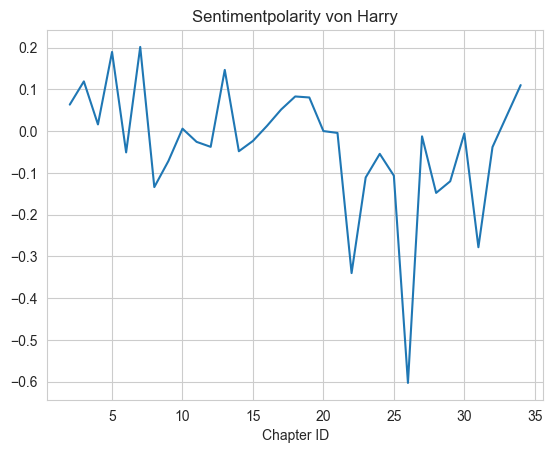

In [13]:
#SentimentAnalyse von Harry pro Chapter
DialogHarry= film1[film1["Character ID"]==1]
DialogHarry

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download("vader_lexicon")
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

scores = DialogHarry.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
DialogHarry["SentimentScore"] = scores
DialogHarry
DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound"))
DialogHarry["PosScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("pos"))
DialogHarry["NegScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neg"))
DialogHarry["NeuScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neu"))
DialogHarry

Chaptersentiment = DialogHarry.groupby("Chapter ID").mean()["CompScore"]
Chaptersentiment
#### PROBLEM: CHAPTER 1 hat Harry nix gesprochen
Chaptersentiment.plot(x= "Chapter ID", y = "CompScore", title="Sentimentpolarity von Harry")

#gesamte HarryScore über alle Kapitel
score = Chaptersentiment.mean()
score # = -0.035501721986438264
###vlt noch Polarität score Intervalle festlegen

In [14]:
#SentimentAnalyse über den gesamten Film
scores = film1.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
film1["SentimentScore"] = scores
film1["CompScore"] = film1.SentimentScore.apply(lambda x: x.get("compound"))
film1["PosScore"] = film1.SentimentScore.apply(lambda x: x.get("pos"))
film1["NegScore"] = film1.SentimentScore.apply(lambda x: x.get("neg"))
film1["NeuScore"] = film1.SentimentScore.apply(lambda x: x.get("neu"))
film1
score = film1.mean()["CompScore"]
score # = 0.04966960451977401

C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\4205520241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["SentimentScore"] = scores
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\4205520241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film1["CompScore"] = film1.SentimentScore.apply(lambda x: x.get("compound"))
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\4205520241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

0.04966960451977401

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\ACG\AppData\Local\Temp\ipykernel_2184\2650111663.py:44: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= "CompScore" ,y ="CharacterName", data = sentiment_characters, order = sentiment_characters.sort_values("CompScore", ascending =False).CharacterName[0:25], color="blue")


           CharacterName  CompScore
0       Albus Dumbledore   0.356476
1            Argus Filch  -0.028883
2           Draco Malfoy   0.001244
3         Dudley Dursley   0.011289
4        Filius Flitwick   0.601375
5                Firenze  -0.101175
6           Fred Weasley  -0.021250
7           Harry Potter  -0.038872
8       Hermione Granger   0.012205
9             Lee Jordan   0.107425
10    Minerva McGonagall   0.278590
11  Nearly Headless Nick   0.022925
12    Neville Longbottom  -0.268313
13           Oliver Wood   0.086129
14         Percy Weasley   0.303378
15       Petunia Dursley   0.215564
16     Quirinus Quirrell   0.112431
17         Rolanda Hooch   0.316650
18           Ron Weasley   0.006272
19         Rubeus Hagrid   0.023758
20       Seamus Finnigan  -0.142300
21         Severus Snape   0.388222
22           Sorting Hat   0.399800
23        Vernon Dursley   0.082373
24             Voldemort  -0.319380


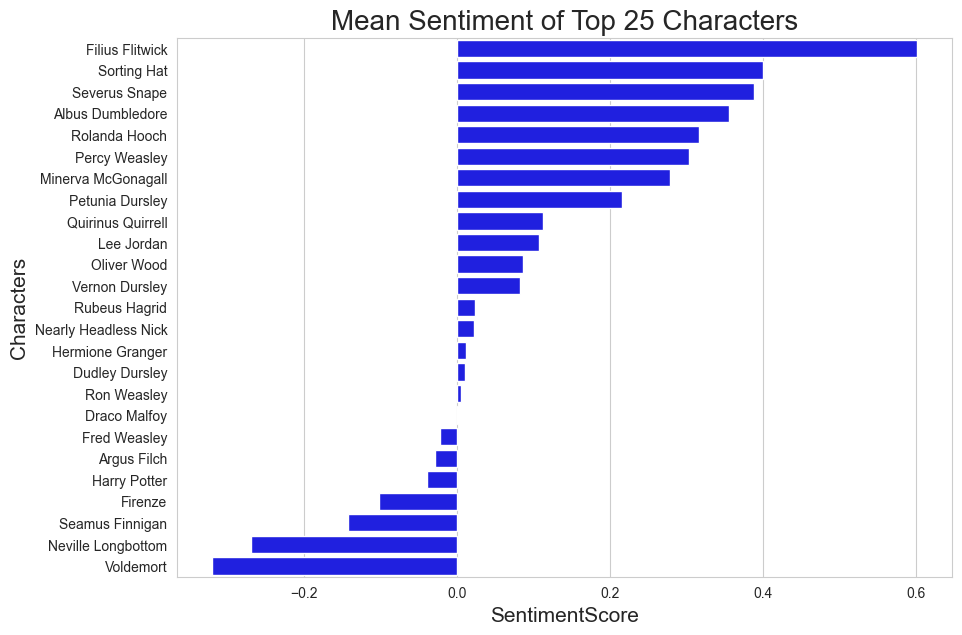

In [15]:
#Sentiment von allen Charakteren
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download("vader_lexicon")
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()
df

dialoge = df["3withoutstopwords"]
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df["wordcountwithoutstopwords"] = wordcount
df
filtered = df[df["wordcountwithoutstopwords"]>2]
counts = filtered["Character Name"].value_counts()
counts = counts[0:25]
counts = pd.DataFrame(counts)
counts["Count"] =counts["Character Name"]
counts["Character Name"]= counts.index
counts = counts.reset_index()
counts = counts.drop("index",axis =1)
counts

filtered = filtered[filtered["Character Name"].isin(counts["Character Name"])]
filtered
scores = filtered.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
filtered["SentimentScore"] = scores

filtered["CompScore"] = filtered.SentimentScore.apply(lambda x: x.get("compound"))
filtered["PosScore"] = filtered.SentimentScore.apply(lambda x: x.get("pos"))
filtered["NegScore"] = filtered.SentimentScore.apply(lambda x: x.get("neg"))
filtered["NeuScore"] = filtered.SentimentScore.apply(lambda x: x.get("neu"))
filtered
sentiment_characters = filtered.groupby("Character Name", as_index =False).CompScore.mean()
sentiment_characters
sentiment_characters = sentiment_characters.rename(columns ={ sentiment_characters.columns[0]: "CharacterName"})
print(sentiment_characters)

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x= "CompScore" ,y ="CharacterName", data = sentiment_characters, order = sentiment_characters.sort_values("CompScore", ascending =False).CharacterName[0:25], color="blue")
plt.xlabel("SentimentScore", fontsize = 15)
plt.ylabel("Characters", fontsize = 15)
plt.title("Mean Sentiment of Top 25 Characters", fontsize = 20)
plt.show()

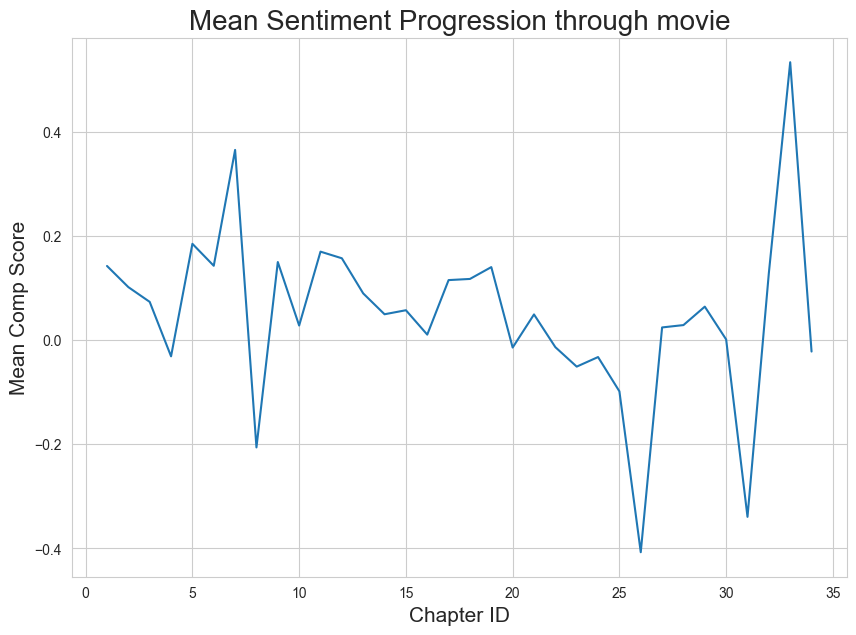

In [16]:
#Sentimentanalyse der Kapitel aber mit allen Charakteren
scores = df.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
df["SentimentScore"] = scores
df["CompScore"] = df.SentimentScore.apply(lambda x: x.get("compound"))
df["PosScore"] = df.SentimentScore.apply(lambda x: x.get("pos"))
df["NegScore"] = df.SentimentScore.apply(lambda x: x.get("neg"))
df["NeuScore"] = df.SentimentScore.apply(lambda x: x.get("neu"))
df

sentimentchapter = pd.DataFrame(df.groupby("Chapter ID", as_index = False).CompScore.mean())
sentimentchapter

#Grafik
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.lineplot(x= "Chapter ID" ,y ="CompScore", data = sentimentchapter)
plt.xlabel("Chapter ID", fontsize = 15)
plt.ylabel("Mean Comp Score", fontsize = 15)
plt.title("Mean Sentiment Progression through movie", fontsize = 20)
plt.show()

#Chapter 1 nicht drinnen und sieht halt anders aus als in Kaggle Character Analysis

In [17]:
#Emotional Sentiment Analyse

import text2emotion as texemo
import emoji


emotionen = []
for line in df["3withoutstopwords"]:
    for word in line:
        emo = texemo.get_emotion(word)
        print(emo)
    keymax = max(emo,key = emo.get)
    emotionen.append(keymax)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [ ]:
df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,3WordCountText,3withoutstopwords,Lemmitization,Character Name,Species,...,Patronus,Wand (Wood),Wand (Core),wordcount,wordcountwithoutstopwords,SentimentScore,CompScore,PosScore,NegScore,NeuScore
0,1,1,8,4,I should have known that you would be here...P...,"[i, should, have, known, that, you, would, be,...","[known, would, professor, mcgonagall]","[known, would, professor, mcgonagall]",Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,11,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[i, m, afraid, so, professor, the, good, and, ...","[afraid, professor, good, bad]","[afraid, professor, good, bad]",Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,10,4,"{'neg': 0.256, 'neu': 0.512, 'pos': 0.232, 'co...",-0.0865,0.232,0.256,0.512
2,5,1,8,4,Hagrid is bringing him.,"[hagrid, is, bringing, him]","[hagrid, bringing]","[hagrid, bringing]",Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,4,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
3,7,1,8,4,"Ah, Professor, I would trust Hagrid with my life.","[ah, professor, i, would, trust, hagrid, with,...","[ah, professor, would, trust, hagrid, life]","[ah, professor, would, trust, hagrid, life]",Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,9,6,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.5106,0.320,0.000,0.680
4,9,1,8,4,"No problems, I trust, Hagrid?","[no, problems, i, trust, hagrid]","[problems, trust, hagrid]","[problem, trust, hagrid]",Albus Dumbledore,Human,...,Phoenix,Elder,Thestral Tail Hair,5,3,"{'neg': 0.533, 'neu': 0.109, 'pos': 0.359, 'co...",-0.1531,0.359,0.533,0.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,843,30,64,9,Yes. You see what I've become? See what I must...,"[yes, you, see, what, i, ve, become, see, what...","[yes, see, become, see, must, survive, live, a...","[yes, see, become, see, must, survive, live, a...",Voldemort,Human,...,NaN,Yew,Phoenix Feather,50,21,"{'neg': 0.083, 'neu': 0.879, 'pos': 0.038, 'co...",-0.4956,0.038,0.083,0.879
881,844,31,64,9,Stop him. Don't be a fool! Why suffer a horri...,"[stop, him, don, t, be, a, fool, why, suffer, ...","[stop, fool, suffer, horrific, death, join, live]","[stop, fool, suffer, horrific, death, join, live]",Voldemort,Human,...,NaN,Yew,Phoenix Feather,19,7,"{'neg': 0.5, 'neu': 0.343, 'pos': 0.158, 'comp...",-0.8996,0.158,0.500,0.343
882,846,31,64,9,Haha. Bravery. Your parents had it too. Tell m...,"[haha, bravery, your, parents, had, it, too, t...","[haha, bravery, parents, tell, harry, would, l...","[haha, bravery, parent, tell, harry, would, li...",Voldemort,Human,...,NaN,Yew,Phoenix Feather,66,27,"{'neg': 0.123, 'neu': 0.724, 'pos': 0.154, 'co...",0.3382,0.154,0.123,0.724
883,848,31,64,9,Kill him!,"[kill, him]",[kill],[kill],Voldemort,Human,...,NaN,Yew,Phoenix Feather,2,1,"{'neg': 0.833, 'neu': 0.167, 'pos': 0.0, 'comp...",-0.7177,0.000,0.833,0.167
